In [27]:
import torch
import torch.nn as nn
import numpy as np 
import pandas as pd
import torch.optim as optim
import matplotlib.pyplot as plt
from torch import FloatTensor
from sklearn import preprocessing as prp 

In [28]:
class DataLoader():
    def __init__(self,com_code,dir_path):
        file_path = dir_path+str(com_code)+'.csv'
        self.raw = pd.read_csv(
            file_path,
            index_col = "date",
            parse_dates = True
        )
        self.device = 'cuda'
    def split(self,split_date):
        self.train = np.array(self.raw[:split_date])
        self.eval = np.array(self.raw[split_date:])

    def make_traindata(self,norm,n_w):
        normed_train = mmscaler.fit_transform(self.train)
        seq = []
        target = []
        for i in range(len(self.train)-n_w):
            seq.append(normed_train[i:i+n_w])
            target.append([self.train[i+n_w][0]])
        seq_t = FloatTensor(seq)
        target_t = FloatTensor(target)
        seq_t_t= (seq_t.permute(1,0,-1)).to(self.device)
        target_t_t= (target_t.permute(0,1)).to(self.device)
        return seq_t_t,target_t_t

    def make_validationdata(self):
        pass
        



In [29]:
class Lstm(nn.Module):
    def __init__(self,num_hidden):
        super().__init__()
        self.hidden_size = num_hidden
        self.lstm = nn.LSTM(
            input_size = 6,
            hidden_size = self.hidden_size,
            )
        self.fc = nn.Linear(self.hidden_size,1)

    def forward(self,x):
        x,_ = self.lstm(x)
        x_last = x[-1]
        x = self.fc(x_last)
        return x
    

In [30]:
def learn(x,y,num_epoch):
    lstm.train()
    losses = []
    for epoch in range(num_epoch):
        optimizer.zero_grad()
        output = lstm(x)
        loss = criterion(output,y)
        loss.backward()
        losses.append(loss.item())
        optimizer.step()
        if epoch % 1000== 0:
            print("epoch{} : loss{}".format(epoch,loss.item()))
    plt.plot(losses[7500:])

In [31]:
data = DataLoader(4578,"/home/ikrfun/Projects/hhlab/raw_data/")
data.split('2021-03-31')
mmscaler = prp.MinMaxScaler(feature_range=(-1,1))
x,y = data.make_traindata(mmscaler,10)

In [32]:
device = 'cuda'
num_epochs = 10000
num_hidden = 1024
lstm = Lstm(num_hidden)
lstm.to(device)
optimizer = optim.Adam(lstm.parameters(),lr = 0.01)
criterion = nn.MSELoss()

epoch0 : loss22086980.0
epoch1000 : loss992658.5625
epoch2000 : loss222280.84375
epoch3000 : loss221219.734375
epoch4000 : loss221219.796875
epoch5000 : loss221219.734375
epoch6000 : loss24878.564453125
epoch7000 : loss6420.58203125
epoch8000 : loss2837.34765625
epoch9000 : loss1440.609619140625


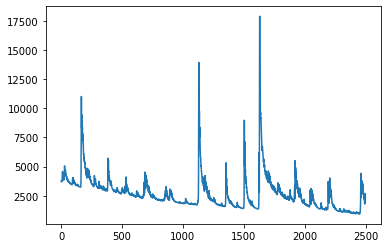

In [33]:
learn(x,y,num_epochs)